## Here I will list the main benefits of having a Hotel Reservation Cancellation prediction model.

- **You will lose less revenue**:
    - **Keep in mind**: In a way, each canceled reservation represents lost potential revenue, right? Since the model accurately predicts reservations that are likely to be canceled, the hotel can develop strategies to reduce the cancellation rate and/or reallocate rooms that would be canceled to reduce the financial impact.


- **Controlled overbooking**:
    - **Reasoning**: You will be able to develop room allocation strategies in a more assertive and intelligent way, as you will be making data-driven decisions rather than guesswork; this will help you avoid dissatisfaction, the discomfort of having to reallocate guests, or having empty rooms as a result of unexpected cancellations.  


- **Improving Customer Experience:**
    - **How it works:** For customers who really need to cancel, transparent communication and rescheduling options can turn a negative experience into a neutral or even positive one.


- **Identifying Patterns and Root Causes of Cancellations:**
    - **Here's how**: Building the model requires analyzing which factors contribute to cancellations (advance booking, market segment type, guest history, etc.). These insights can lead to changes in booking policies, packages offered, or how the hotel communicates with guests, addressing the underlying causes of cancellations.


In [1]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Visual Settings
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.float_format", lambda x:f"{x:,.4f}")

# Global adjustment
plt.rcParams["figure.figsize"] = (11, 6)

# Graphic style
plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")
sns.set_palette("Set1")


DATA_RAW= '../artifacts/raw/raw.csv'

# Data Preprocessing

In [2]:
# Loading and Displaying Data
df = pd.read_csv(DATA_RAW)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.6800,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.0000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.0000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5000,0,Canceled


In [3]:
# Checking the data body
df.shape

(36275, 19)

In [4]:
# Checking for Missing Values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
# Analyzing column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Observing which columns are present in the df
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
# Dropping irrelevant columns
df.drop(columns=['Booking_ID'], axis=1, inplace=True)
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.6800,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.0000,0,Canceled


In [9]:
df.drop_duplicates(inplace=True)
df.shape

(26000, 18)

- I have to admit that it is strange that the “df.duplicated()” instruction did not identify any duplicates, but when I ran the “df.drop_duplicates(inplace=True)” command, it removed some of the rows. I ran this command even though I did not identify any duplicate rows, simply because this dataset is known to have some duplicate rows.


- As for the “Booking_ID” column, it was removed due to its high cardinality. These are just identifiers, unique values that do not offer patterns to be identified by the model.

In [10]:
df['booking_status'].value_counts(normalize=True).mul(100)

booking_status
Not_Canceled   71.3769
Canceled       28.6231
Name: proportion, dtype: float64

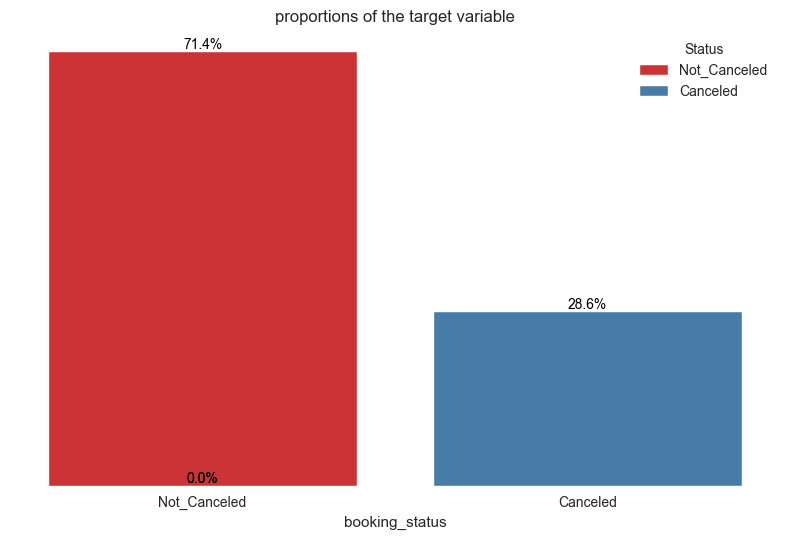

In [11]:
# Checking the target variable distribution
ax = sns.countplot(x= df['booking_status'], hue=df.booking_status, stat='percent', legend=True)
plt.title("proportions of the target variable")
plt.ylabel("proportion (percentage)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Not_Canceled', 'Canceled'], title="Status", loc='upper right')



for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
num_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_columns = [feature for feature in df.columns if df[feature].dtype == 'O']


print(f"We have {len(num_columns)} numerical features:\n{num_columns}")
print()
print(f"We have {len(cat_columns)} categorical features:\n{cat_columns}")
print()

for col in cat_columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('------------------------------')

We have 14 numerical features:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

We have 4 categorical features:
['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

type_of_meal_plan
Meal Plan 1    78.4538
Not Selected   17.1654
Meal Plan 2     4.3615
Meal Plan 3     0.0192
Name: proportion, dtype: float64
------------------------------
room_type_reserved
Room_Type 1   71.6923
Room_Type 4   20.8577
Room_Type 6    3.6269
Room_Type 2    2.3077
Room_Type 5    0.8923
Room_Type 7    0.6000
Room_Type 3    0.0231
Name: proportion, dtype: float64
------------------------------
market_segment_type
Online          76.9962
Offline         15.8154
Corporate        5.4308
Complementary    1.3731
Aviation     

# DATA ANALYSIS

### UNIVARIATE AND BIVARIATE ANALYSIS

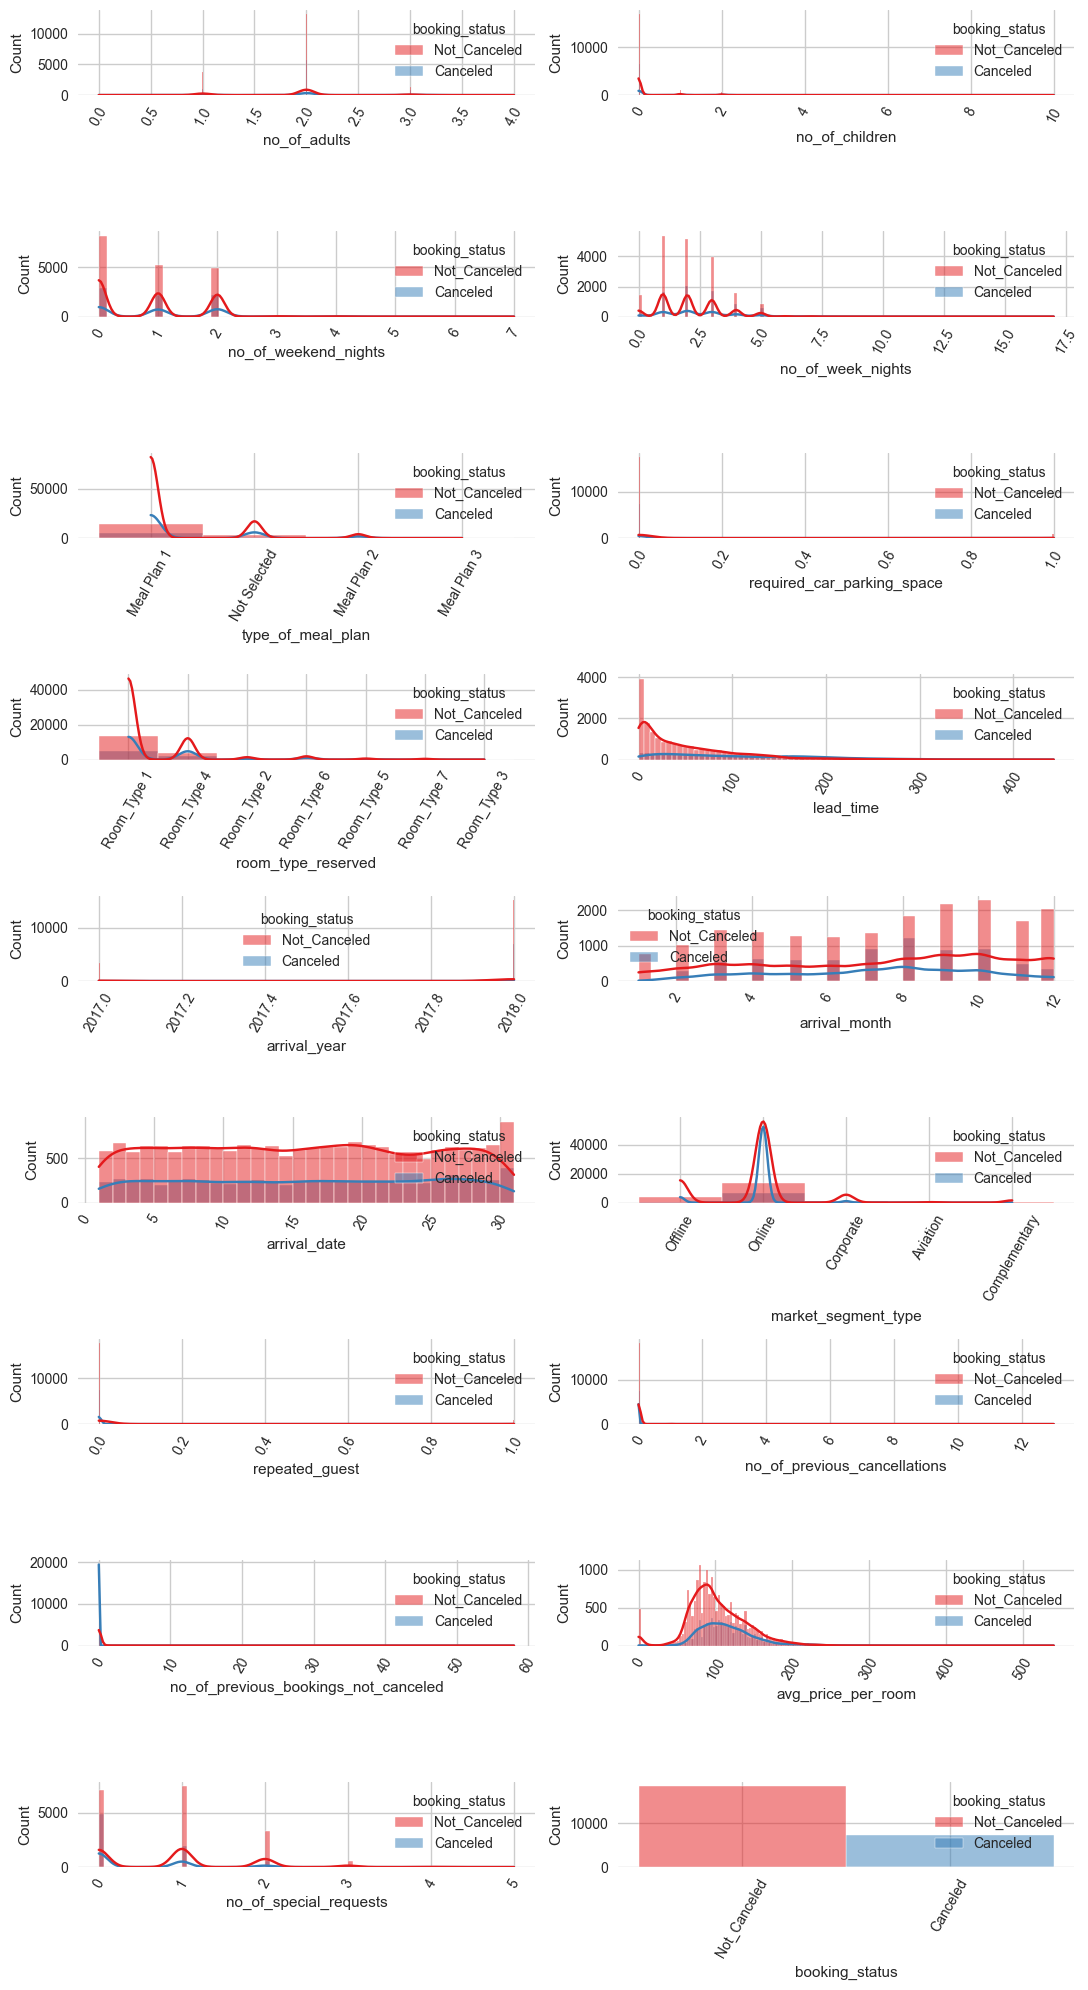

In [13]:
fig, axs = plt.subplots(9, 2, figsize=(11, 20),tight_layout=True)

for ax, col in zip(axs.flatten(), df.columns):
    sns.histplot(data=df, x=col, ax=ax, hue=df['booking_status'], kde=True)
    ax.tick_params(axis = 'x' , rotation = 60)


plt.show()

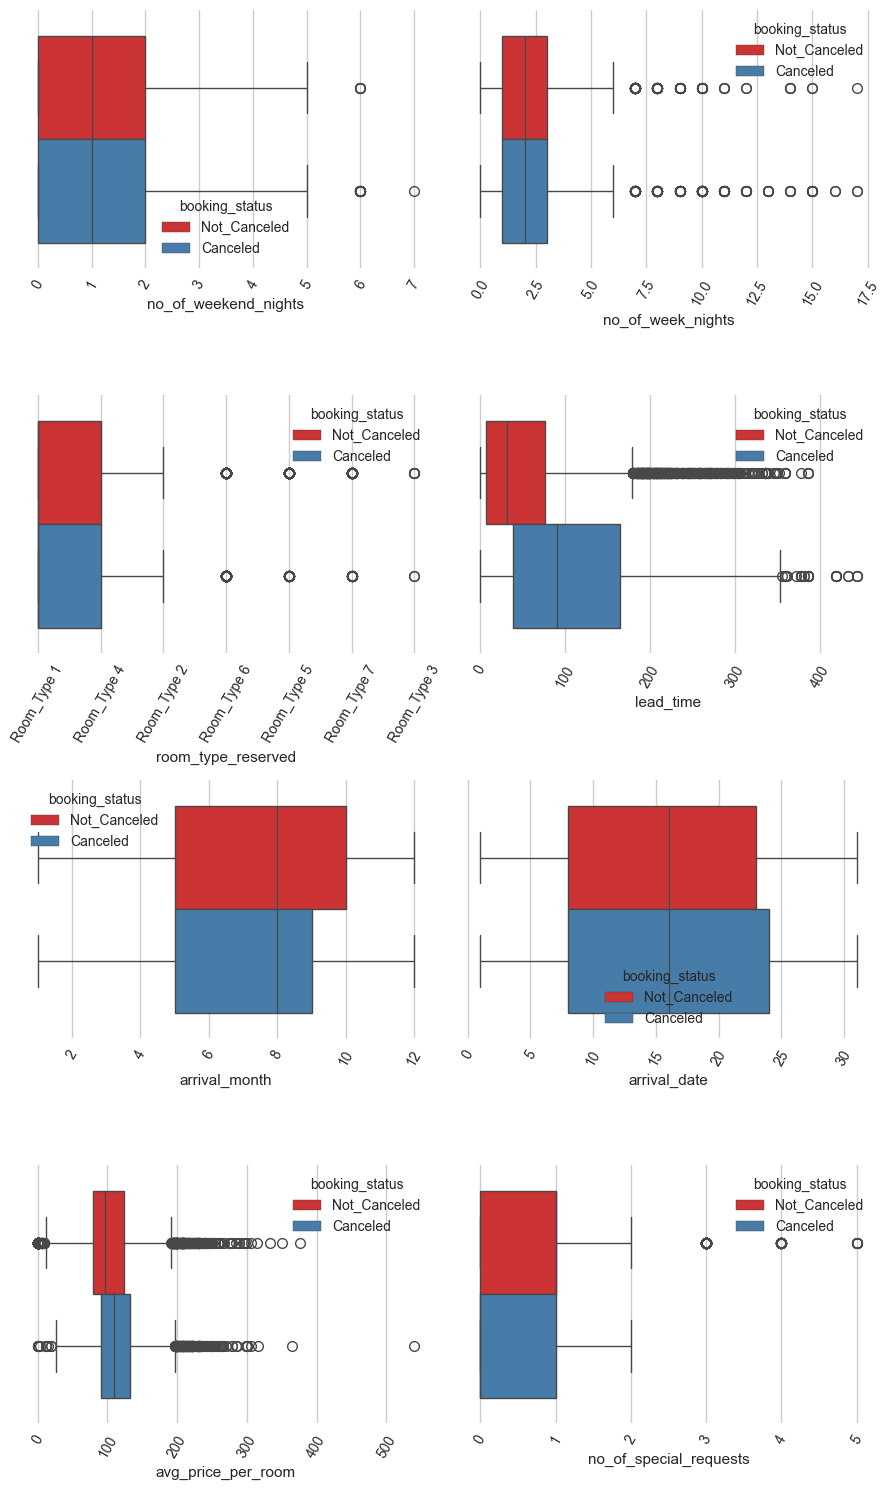

In [14]:
columns = [
    'no_of_weekend_nights', 'no_of_week_nights', 'room_type_reserved', 'lead_time', 'arrival_month',
    'arrival_date', 'avg_price_per_room', 'no_of_special_requests'
    ]
fig, axs = plt.subplots(4, 2, figsize=(9, 15),tight_layout=True)


for ax, col in zip(axs.flatten(), df[columns]):
    sns.boxplot(data=df, x=col, ax=ax, hue=df['booking_status'])
    ax.tick_params(axis='x', rotation=60)

plt.show()

- According to the univariate analysis taking into account the target variable (booking_status), there is no clear distinction between the value distributions for **Not_Canceled** and **Canceled**, except for a small difference in the distributions of the **lead_time** column.

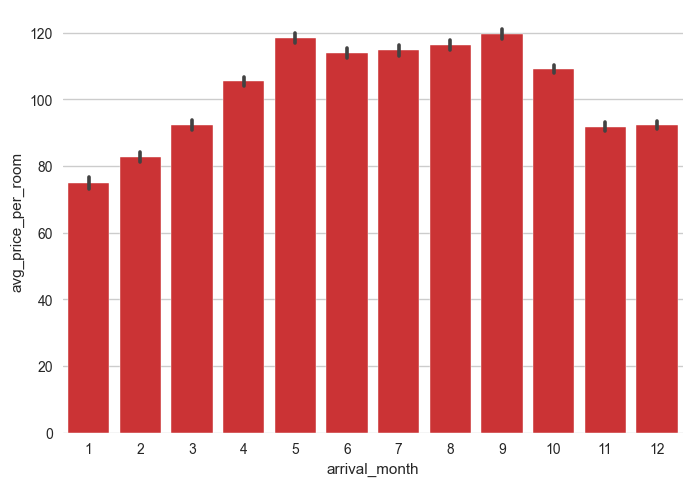

In [15]:
sns.barplot(x = 'arrival_month', y = "avg_price_per_room", data = df)
plt.show()

- **Seasonality of Prices**:
- This indicates that, for most months of the year (March to November), the hotel is able to charge a higher price for its rooms. This suggests that these are the high or mid-season periods for the hotel in question.
- **High Demand**:
    - Higher prices are usually a reflection of higher demand for accommodation during these months. Customers are more willing to pay more to stay at the hotel during this period.
- **This demand can be driven by several factors**:
- **Weather**: 
        Months with more pleasant weather for tourism (spring, summer, fall).
    - **Holidays and Events**:
Periods with long holidays, school vacations, conferences, festivals, or other local/regional events that attract visitors.
- **Travel Season**:
Simply the time of year when people tend to travel more.
        Lowest Price Period: This implies that the months outside this range (December, January, February, and perhaps a little of March and November, depending on the transition) are low season, when the hotel needs to reduce prices to attract guests due to lower demand.

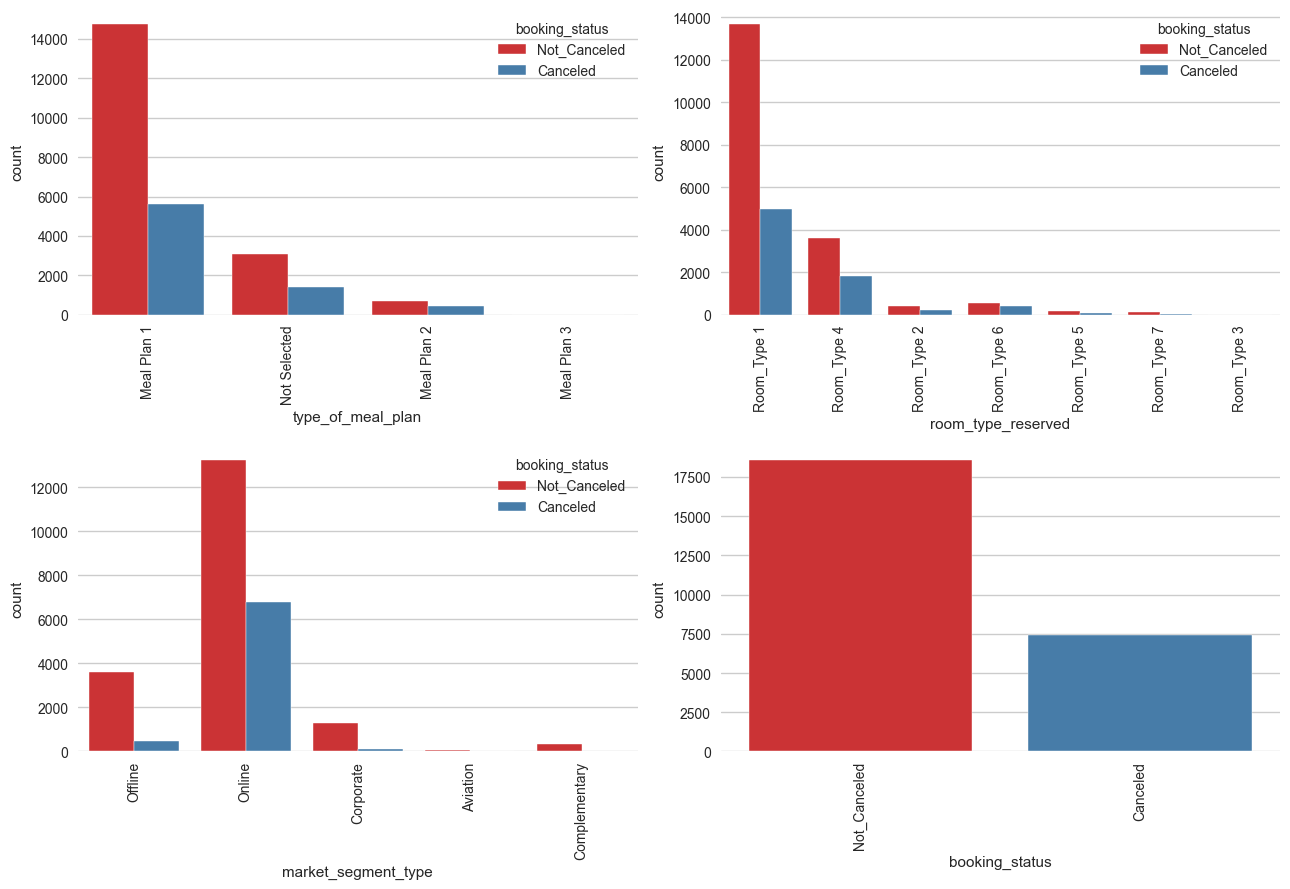

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(13, 9),tight_layout=True)


for ax, col in zip(axs.flatten(), df[cat_columns]):
    sns.countplot(data=df, x=col, ax=ax, hue=df['booking_status'])
    ax.tick_params(axis='x', rotation=90)

plt.show()

- Detailed information regarding the characteristics is not provided to us by the hotel, such as what *Meal Plan 1* is. We know that it is a type of meal plan, but we do not know what it consists of.
- Similarly, regarding the Room Type reserved by the customer, we are not informed of the characteristics of these rooms, whether they are more basic or luxurious. What we are told is that their respective prices are encrypted (coded) by INN Hotels.

- So, what we can say is that most people prefer the “Room_Type_1” room type, and that most people, whether they cancel or do not cancel, prefer “Meal Plan 1,” and most reservations are made “online,” whether canceled or not.

## FEATURE ENGINEERING

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
mappings = {}

for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [19]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  int64  
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  int64  
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_type 

In [21]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [23]:
vif_data

,Feature,VIF
0,const,"41,299,134.1521"
1,no_of_adults,1.3379
2,no_of_children,1.2849
3,no_of_weekend_nights,1.0776
4,no_of_week_nights,1.1312
5,type_of_meal_plan,1.1774
6,required_car_parking_space,1.0330
7,room_type_reserved,1.5559
8,lead_time,1.4112
9,arrival_year,1.2913


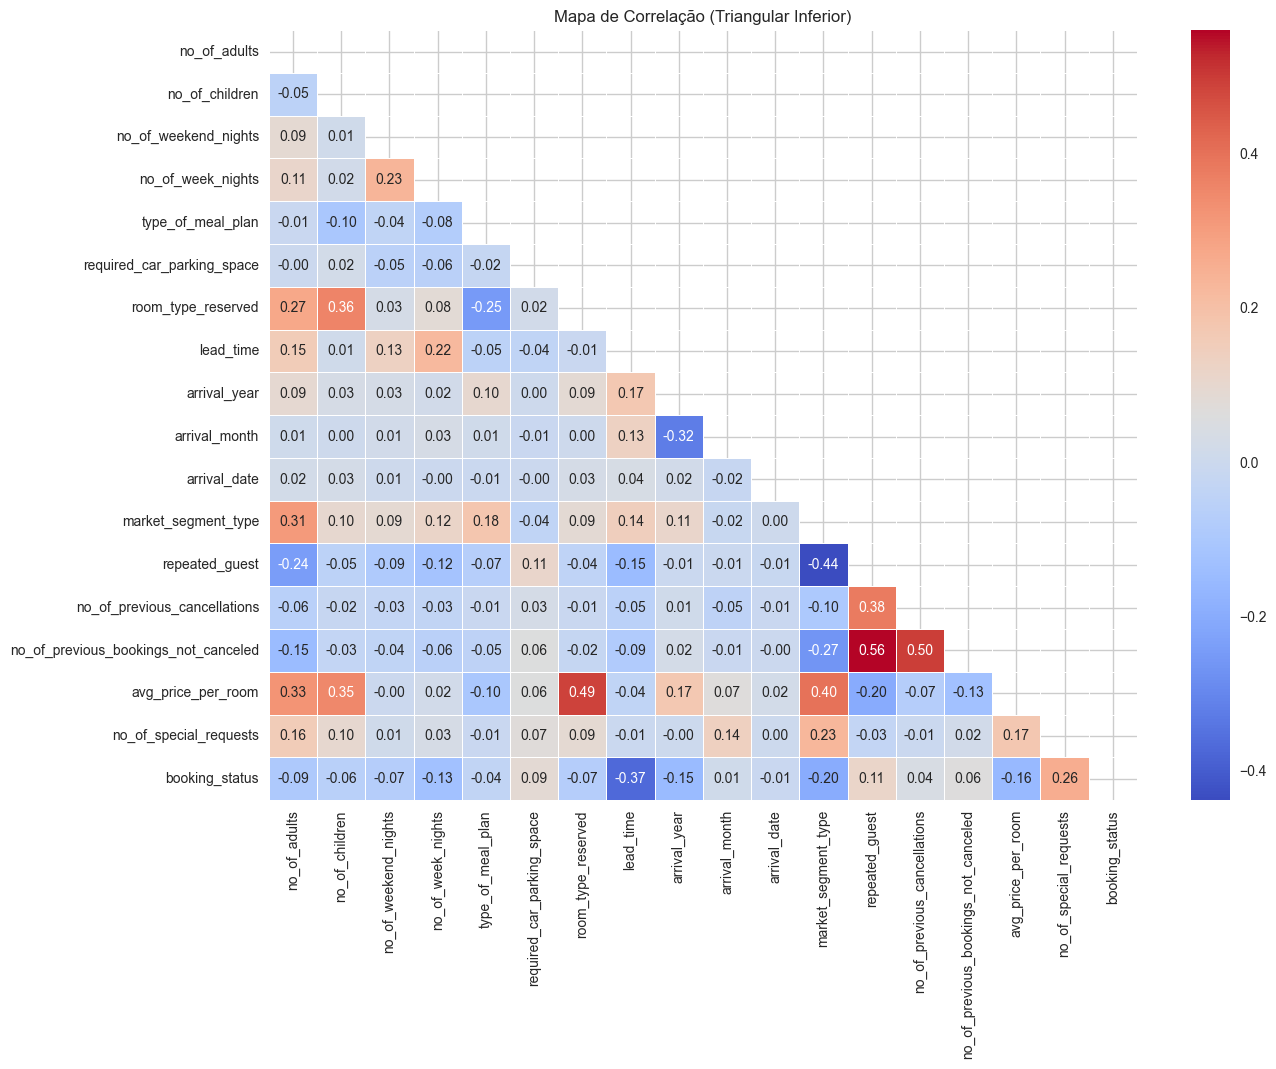

In [24]:
# correlation analysis
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação (Triangular Inferior)")

plt.show()

In [25]:
skewness  = df.skew()
skewness

no_of_adults                           -0.2970
no_of_children                          4.0057
no_of_weekend_nights                    0.6597
no_of_week_nights                       1.6019
type_of_meal_plan                       1.6386
required_car_parking_space              4.5597
room_type_reserved                      1.3732
lead_time                               1.4079
arrival_year                           -1.9635
arrival_month                          -0.2922
arrival_date                            0.0122
market_segment_type                    -2.3823
repeated_guest                          5.2491
no_of_previous_cancellations           21.9392
no_of_previous_bookings_not_canceled   16.2990
avg_price_per_room                      0.5884
no_of_special_requests                  0.9111
booking_status                         -0.9459
dtype: float64

In [26]:
for col in df.columns:
    if(skewness[col] > 5):
        df[col] = np.log1p(df[col])

In [27]:
skewness = df.skew()
skewness

no_of_adults                           -0.2970
no_of_children                          4.0057
no_of_weekend_nights                    0.6597
no_of_week_nights                       1.6019
type_of_meal_plan                       1.6386
required_car_parking_space              4.5597
room_type_reserved                      1.3732
lead_time                               1.4079
arrival_year                           -1.9635
arrival_month                          -0.2922
arrival_date                            0.0122
market_segment_type                    -2.3823
repeated_guest                          5.2491
no_of_previous_cancellations           13.2609
no_of_previous_bookings_not_canceled    7.5379
avg_price_per_room                      0.5884
no_of_special_requests                  0.9111
booking_status                         -0.9459
dtype: float64

# DATA RESAMPLING

In [28]:
df['booking_status'].value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [29]:
X = df.drop(columns = ['booking_status'])
Y = df['booking_status']

In [30]:
Y.value_counts()

booking_status
1    18558
0     7442
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [32]:
Y_resampled.value_counts()

booking_status
1    18558
0    18558
Name: count, dtype: int64

In [33]:
# Our input data is still not resampled

df.shape

(26000, 18)

In [34]:
# Creating new data with resampled data

balanced_data = pd.DataFrame(X_resampled, columns = X.columns)
balanced_data['booking_status'] = Y_resampled

data = balanced_data.copy()
data.shape

(37116, 18)

In [35]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns = ['booking_status'])
Y = data['booking_status']

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X, Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
important_features = rf_model.feature_importances_
print(important_features)

[0.0180061  0.00682066 0.02928441 0.044513   0.01993557 0.01138847
 0.01934162 0.26456601 0.01674421 0.08517248 0.08303594 0.06047374
 0.00624324 0.00032328 0.00315287 0.14749666 0.18350174]


In [37]:
important_features_data = pd.DataFrame({
    'feature': X.columns,
    'importance': important_features
})
important_features_data

,feature,importance
0,no_of_adults,0.0180
1,no_of_children,0.0068
2,no_of_weekend_nights,0.0293
3,no_of_week_nights,0.0445
4,type_of_meal_plan,0.0199
5,required_car_parking_space,0.0114
6,room_type_reserved,0.0193
7,lead_time,0.2646
8,arrival_year,0.0167
9,arrival_month,0.0852


In [38]:
top_important_features_data = important_features_data.sort_values(by = "importance" , ascending = False)

top_10_features = top_important_features_data['feature'].head(10).values

top_10_data = data[top_10_features.tolist() + ['booking_status']]
top_10_data.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,224,0,65.0000,10,2,3,2,1,0,0,1
1,5,1,106.6800,11,6,4,3,2,3,0,1
2,1,0,60.0000,2,28,4,1,2,0,0,0
3,211,0,100.0000,5,20,4,2,0,0,0,0
4,48,0,94.5000,4,11,4,1,1,3,0,0


In [39]:
data = top_10_data.copy()

In [40]:
# Feature splitting

X = data.drop(columns = 'booking_status')
Y = data["booking_status"]

In [41]:
# Train-Test Splitting

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [43]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [44]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [45]:
# Pipeline for Model Training

for model_name, model in classifiers.items():
    print(f"Training {model_name} with specified parameters")
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    print(f"Successfully trained {model_name}!")
    print(f"{model_name} Accuracy is: {accuracy:.2f}")
    print("-" * 60)

Training Random Forest with specified parameters
Successfully trained Random Forest!
Random Forest Accuracy is: 0.88
------------------------------------------------------------
Training LogisticRegression with specified parameters
Successfully trained LogisticRegression!
LogisticRegression Accuracy is: 0.77
------------------------------------------------------------
Training Gradient Boosting with specified parameters
Successfully trained Gradient Boosting!
Gradient Boosting Accuracy is: 0.83
------------------------------------------------------------
Training Suuport vector classifier with specified parameters
Successfully trained Suuport vector classifier!
Suuport vector classifier Accuracy is: 0.73
------------------------------------------------------------
Training Decsion Tree with specified parameters
Successfully trained Decsion Tree!
Decsion Tree Accuracy is: 0.83
------------------------------------------------------------
Training KNN with specified parameters
Successfull

In [46]:
metrics_data = pd.DataFrame(metrics)
metrics_data

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.8829,0.8783,0.8834,0.8808
1,LogisticRegression,0.7679,0.7861,0.7228,0.7531
2,Gradient Boosting,0.8268,0.8069,0.8496,0.8277
3,Suuport vector classifier,0.7299,0.7276,0.7170,0.7223
4,Decsion Tree,0.8297,0.8369,0.8102,0.8234
5,KNN,0.7810,0.8404,0.6823,0.7532
6,Naive Bayes,0.7675,0.7829,0.7269,0.7539
7,XGboost,0.8695,0.8613,0.8743,0.8677
8,Adaboost,0.8015,0.8026,0.7885,0.7955
9,LGBM,0.8567,0.8386,0.8760,0.8569


In [47]:
# Feature splitting
X = data.drop(columns = 'booking_status')
Y = data["booking_status"]

# Train-Test Splitting
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [48]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rf = RandomForestClassifier(random_state = 42)

# We will utilize these hyperparameters
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True , False] 
}

In [50]:
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = params_dist,  # Hyperparameter distributions
    n_iter = 5,                         # Number of parameter settings that are sampled
    cv = 5,                             # 5-Fold Cross Validation   
    verbose = 2,                        # Verbose is used for more detailed output, means it will print the progress
    random_state = 42,                  # Random state for reproducibility
    scoring = 'accuracy'                # Scoring metric to evaluate the models
)

In [51]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.6s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001CF9F15B250>, 'min_samples_leaf': <scipy.stats....001CF9F1CE850>, 'min_samples_split': <scipy.stats....001CF9C752ED0>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [52]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [53]:
# Selecting the model with best parameters

best_rf_model = random_search.best_estimator_

In [54]:
# Predicting the output 

Y_pred = best_rf_model.predict(X_test)

In [55]:
print(f"Accuracy Score of the Random Forest Model: {accuracy_score(Y_test, Y_pred):.2f}")
print(f"Recall of the Random Forest Model: {recall_score(Y_test, Y_pred):.2f}")
print(f"Precision of the Random Forest Model: {precision_score(Y_test, Y_pred):.2f}")
print(f"F1 Score of the Random Forest Model: {f1_score(Y_test, Y_pred):.2f}")

Accuracy Score of the Random Forest Model: 0.88
Recall of the Random Forest Model: 0.89
Precision of the Random Forest Model: 0.87
F1 Score of the Random Forest Model: 0.88


In [ ]:
import joblib

joblib.dump(best_rf_model, "random_forest.pkl")

In [ ]:
loaded_model = joblib.load("random_forest.pkl")

In [58]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
12105,57,0,60.0000,11,17,3,3,0,0,3


In [59]:
new_data = np.array([190, 100.0000, 0, 5, 31, 2, 3, 0, 2018, 1]).reshape(1, -1)

In [ ]:
prediction = loaded_model.predict(new_data)
prediction

array([1])

- Although the RandomForest algorithm performed better, we will use LightGBM because it is lighter, and the difference in accuracy is only 4, and in precision 2.